# Supervised Learning Model Evaluation for stroke diagnosis

Stroke diagnosis involves a comprehensive assessment to determine the presence, type, and severity of a stroke, a serious medical condition characterized by disrupted blood flow to the brain along with demographic details of the patients. 

DATA DESCRIPTION FOR CATEGORICAL VARIABLE:

1. gender:
Male = 1
Female = 2
Other = 3

2. ever_married:
Yes = 1
No = 2

3. work_type:
Children = 1
Private = 2
Self-employed = 3
Govt_job = 4
Never_worked = 5

4. Residence_type:
Rural = 1
Urban = 2

5. Smoking status:
smokes = 1
unknown = 2
formerly smoked = 3
never smoked = 4


1. Import the stroke.csv dataset, get info, print header and examine the data

In [1]:
import pandas as pd
stroke = pd.read_csv('./stroke.csv')
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31,0,0,2,4,1,70.66,27.2,4,0
1,2,13,0,0,2,1,1,85.81,18.6,2,0
2,1,18,0,0,2,2,2,60.56,33.0,4,0
3,2,65,0,0,1,2,2,205.77,46.0,3,1
4,1,4,0,0,2,1,1,90.42,16.2,2,0


2. The target variable is stroke, perform model evaluation by comparing 4 different algorithms. Determine the model accuracy. Plot confusion matrix for all four algorithms. Compare the model accuracy and determine which algorithm is the best fit to predict the diagnosis of stroke. 

In [9]:
#Cleaning Data
#stroke[stroke['age']=='*82']
#stroke['age'] = stroke['age'].astype(int)
#stroke['age']

mean_bmi = stroke['bmi'].mean()
#
#stroke['bmi']
#troke.isna().sum()
stroke['bmi'].fillna(mean_bmi, inplace=True)

In [10]:
X = stroke.drop(['stroke'], axis=1)
y = stroke['stroke']
X.dtypes

gender                 int64
age                    int64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
dtype: object

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [13]:
accuracies = {} #Empty dictionary to combine the accuracies of all the algorithms

lr_lr = LogisticRegression() #create model
lr_lr.fit(X_train, y_train) #fit the training data

acc = lr_lr.score(X_test, y_test)*100 #compute accuracy of model

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 86.40%


C:\Users\Jy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [15]:

lr_dtc = dtc #create model
lr_dtc.fit(X_train, y_train) #fit the training data

acc = lr_dtc.score(X_test, y_test)*100 #compute accuracy of model

accuracies['Decision Tree'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 81.14%


In [16]:
lr_rf = rf #create model
lr_rf.fit(X_train, y_train) #fit the training data

acc = lr_rf.score(X_test, y_test)*100 #compute accuracy of model

accuracies['Random Forest'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 84.65%


In [17]:
lr_knn = knn #create model
lr_knn.fit(X_train, y_train) #fit the training data

acc = lr_knn.score(X_test, y_test)*100 #compute accuracy of model

accuracies['K Nearest Neighbor'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.09%


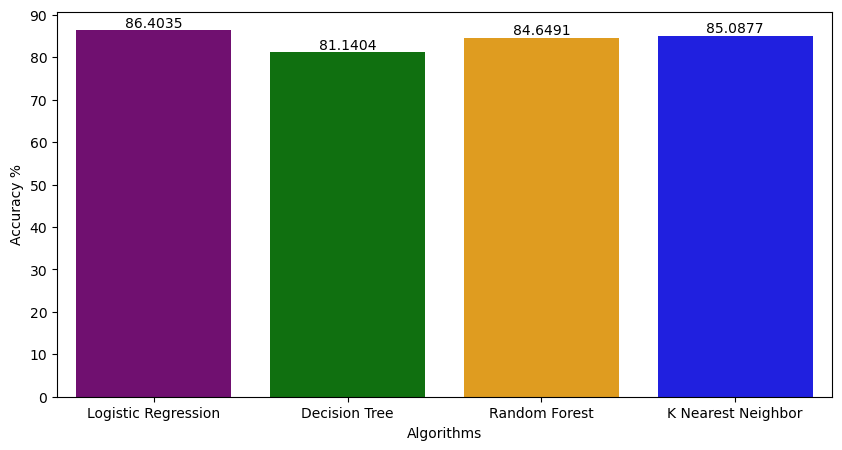

In [18]:
import numpy as np
colors = ['purple', 'green', 'orange', 'blue']

#sns.set_syle('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel('Accuracy %')
plt.xlabel('Algorithms')
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [21]:
y_head_lr = lr_lr.predict(X_test)
y_head_dtc = lr_dtc.predict(X_test)
y_head_rf = lr_rf.predict(X_test)
y_head_knn = lr_knn.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_head_lr)
cm_lr_dtc = confusion_matrix(y_test, y_head_dtc)
cm_lr_rf = confusion_matrix(y_test, y_head_rf)
cm_lr_knn = confusion_matrix(y_test, y_head_knn)

<Axes: title={'center': 'K-Nearest Neighbor Confusion Matrix'}>

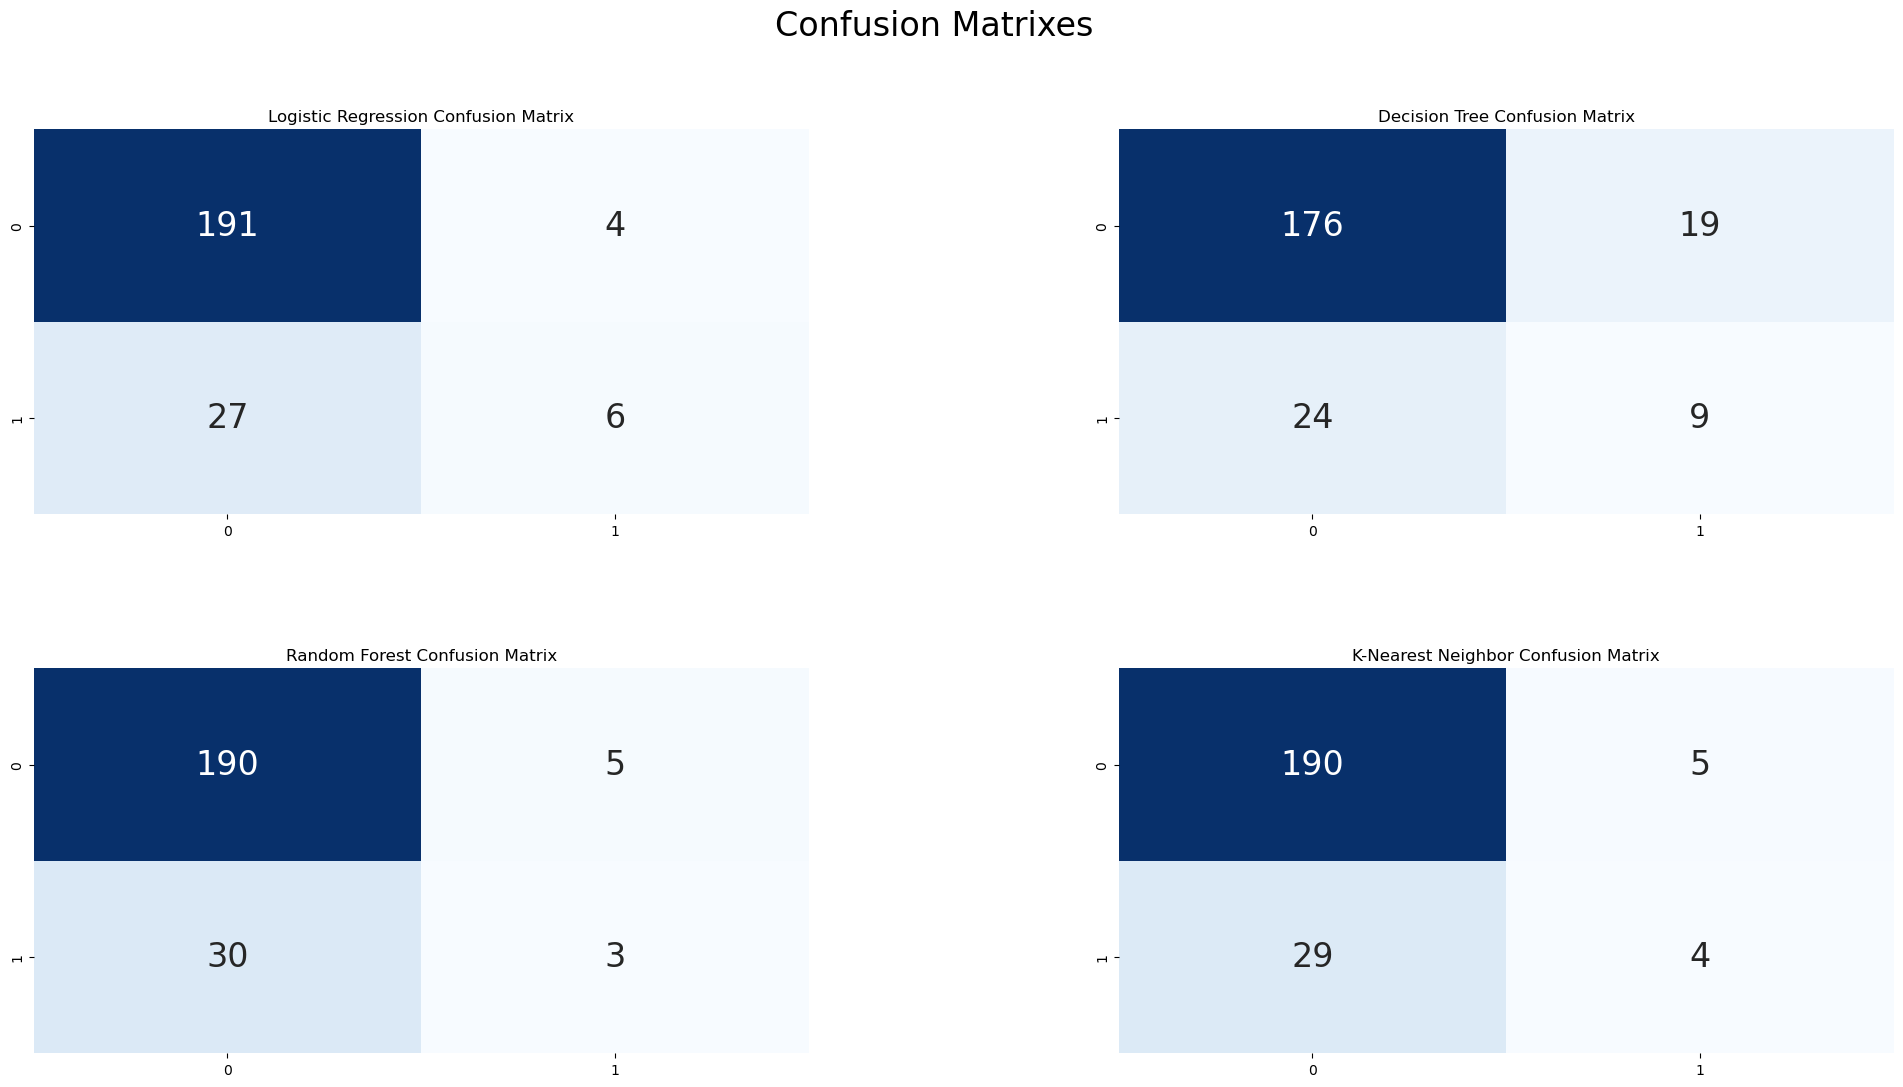

In [22]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(2,2,2)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_lr_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(2,2,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_lr_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.subplot(2,2,4)
plt.title("K-Nearest Neighbor Confusion Matrix")
sns.heatmap(cm_lr_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

## Random Forest has highest accuracy so we go with that

In [23]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
rf_classifier = RandomForestClassifier(random_state=25)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


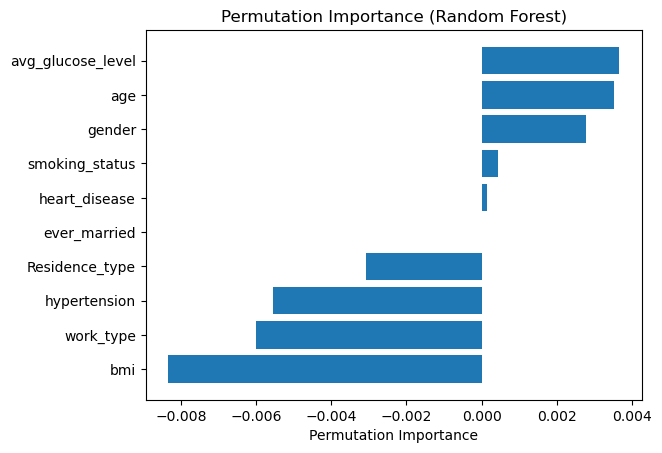

In [25]:
perm_importance = permutation_importance(rf_classifier, X_test, y_test, n_repeats=30, random_state=25)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance['importances_mean']
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Random Forest)')
plt.show()


## glucose_level, age, gender has the highest importance for permutation

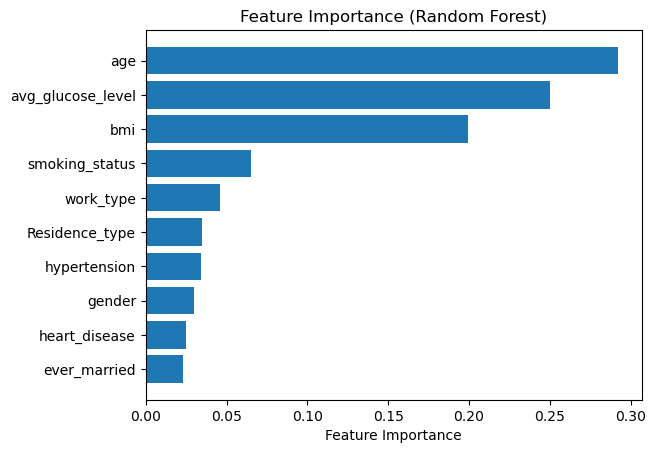

In [26]:
# Get feature importances from RandomForest
rf_feature_importances = rf_classifier.feature_importances_

# Sort features by importance
sorted_idx_rf = rf_feature_importances.argsort()

# Plot feature importances from RandomForest
plt.barh(range(len(sorted_idx_rf)), rf_feature_importances[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


## Age, bmi, glucose level has the highest importance for feature importance so we remodel based on that

In [27]:
#New X and y values
#X = stroke[['age', 'avg_glucose_level', 'bmi', 'smoking_status']]
X = stroke[['age', 'avg_glucose_level', 'bmi']]
y = stroke['stroke']
X

,age,avg_glucose_level,bmi
0,31,70.66,27.2
1,13,85.81,18.6
2,18,60.56,33.0
3,65,205.77,46.0
4,4,90.42,16.2
...,...,...,...
1131,1,110.17,20.3
1132,6,92.98,18.9
1133,81,234.35,25.3
1134,81,80.43,29.7


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
rf_classifier = RandomForestClassifier(random_state=25)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


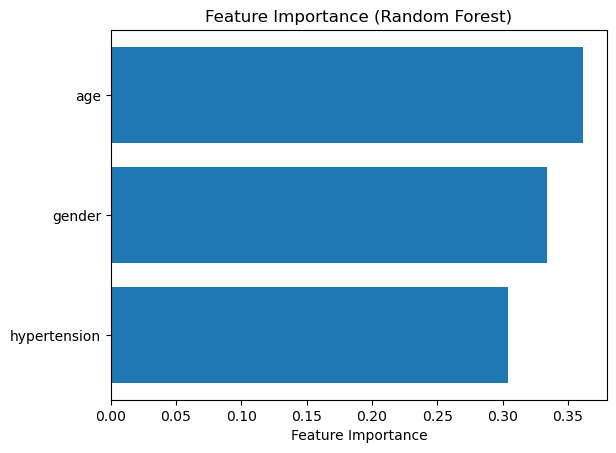

In [30]:
# Get feature importances from RandomForest
rf_feature_importances = rf_classifier.feature_importances_

# Sort features by importance
sorted_idx_rf = rf_feature_importances.argsort()

# Plot feature importances from RandomForest
plt.barh(range(len(sorted_idx_rf)), rf_feature_importances[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [ ]:
#conda install -c anaconda graphviz

In [31]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Decision tree
import matplotlib.pyplot as plt
import pydotplus

In [42]:
important_features = ['age', 'avg_glucose_level', 'bmi', 'work_type']

f = stroke[important_features] #input
t = stroke['stroke'] #target

In [43]:
# Create and fit the decision tree
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree.png')

True